# WFGS Slit Detection

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Removing-Background-and-Finding-approximate-Slit-Position" data-toc-modified-id="Removing-Background-and-Finding-approximate-Slit-Position-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Removing Background and Finding approximate Slit Position</a></span><ul class="toc-item"><li><span><a href="#Plotting" data-toc-modified-id="Plotting-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plotting</a></span></li><li><span><a href="#Comparisson" data-toc-modified-id="Comparisson-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Comparisson</a></span></li><li><span><a href="#extract-slit-shape-from-foreground" data-toc-modified-id="extract-slit-shape-from-foreground-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>extract slit shape from foreground</a></span></li><li><span><a href="#Speed-improvement-of-the-slit-extraction-routine" data-toc-modified-id="Speed-improvement-of-the-slit-extraction-routine-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Speed improvement of the slit extraction routine</a></span></li></ul></li><li><span><a href="#Summary-and-Slit-Line-Position-Mark" data-toc-modified-id="Summary-and-Slit-Line-Position-Mark-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary and Slit Line Position Mark</a></span></li><li><span><a href="#Slit-Width" data-toc-modified-id="Slit-Width-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Slit Width</a></span></li><li><span><a href="#Fitting" data-toc-modified-id="Fitting-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Script-Description-&amp;--Benchmark" data-toc-modified-id="Script-Description-&amp;--Benchmark-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Script Description &amp;  Benchmark</a></span><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Benchmark</a></span></li><li><span><a href="#TODO:" data-toc-modified-id="TODO:-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>TODO:</a></span></li></ul></li><li><span><a href="#Version-2:-Outer--and-Inner-Slit-Center" data-toc-modified-id="Version-2:-Outer--and-Inner-Slit-Center-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Version 2: Outer- and Inner-Slit Center</a></span></li><li><span><a href="#Outer-slit-simple" data-toc-modified-id="Outer-slit-simple-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Outer slit simple</a></span></li><li><span><a href="#Rotated-Slit" data-toc-modified-id="Rotated-Slit-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Rotated Slit</a></span><ul class="toc-item"><li><span><a href="#Load-rotated-slit-data" data-toc-modified-id="Load-rotated-slit-data-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Load rotated slit data</a></span></li><li><span><a href="#Slit-detection" data-toc-modified-id="Slit-detection-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Slit detection</a></span></li><li><span><a href="#Extracting-the-slit-edges-of-a-rotated-slit-through-projection." data-toc-modified-id="Extracting-the-slit-edges-of-a-rotated-slit-through-projection.-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Extracting the slit edges of a rotated slit through projection.</a></span></li><li><span><a href="#Slit-Derotation-and-Testing" data-toc-modified-id="Slit-Derotation-and-Testing-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Slit Derotation and Testing</a></span></li></ul></li></ul></div>

In [1]:
import time
from glob import glob
import numpy as np
import cv2

from astropy.io import fits
import pyregion

from scipy import ndimage
from scipy.signal import find_peaks

from matplotlib import pylab as plt
import matplotlib as mpl
mpl.rc('image', cmap='bone_r')

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

## Loading Data

In [2]:
tiffpath = "strFITS/"
FITSlist = glob(tiffpath+"*.fits")
print FITSlist

['strFITS/slv190202_test.fits', 'strFITS/slv190221_0003.fits', 'strFITS/slv190221_0004.fits', 'strFITS/slv190221_0005.fits']


In [3]:
IMAGES = []
for i in FITSlist:
    data = fits.open(i)[0].data
    #cv2.imwrite(tiffpath+i[:-5]+".tiff",data)
    IMAGES.append(data)
IMAGES = np.asarray(IMAGES).astype(float)

In [4]:
ALL = np.hstack([IMAGES[0],IMAGES[1],IMAGES[2],IMAGES[3]])

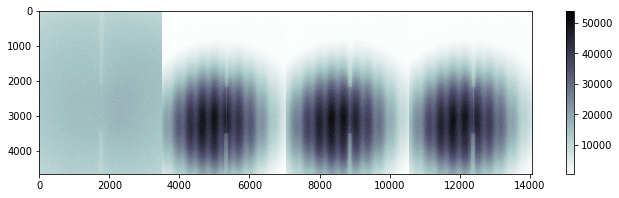

In [5]:
plt.figure(figsize=(12,3))
plt.imshow(ALL)
plt.colorbar()
plt.grid(False)
plt.show()

## Removing Background and Finding approximate Slit Position
As seen in the images above, all images contain a strong background with relatively high contrast. Fortunately, compared to the background, the slit is a sharp object which makes it easy to extract by filtering. With the given data, it seems that two iterations of gauss filtering a sufficient to properly differentiate the slit from the background.

In [6]:
IM  = IMAGES[1]
IM0 = ndimage.gaussian_filter(IM,25)
IM1 = IM  - IM0
IM2 = ndimage.gaussian_filter(IM1,15)

### Plotting

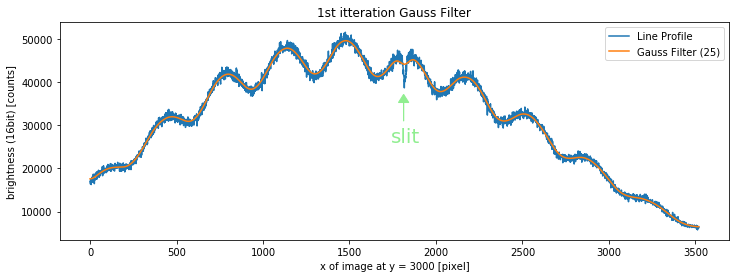

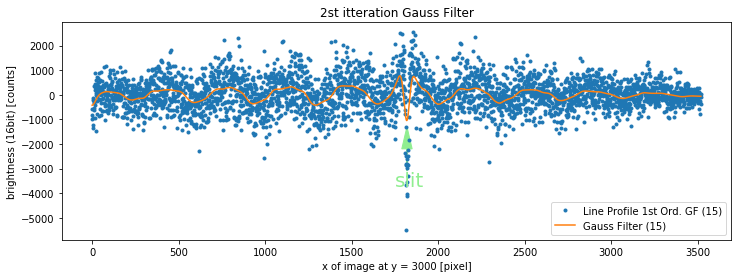

In [7]:
plt.figure(figsize = (12,4))
plt.plot(IM[3000],  label = "Line Profile")
plt.plot(IM0[3000], label = "Gauss Filter (25)")
plt.title("1st itteration Gauss Filter")
plt.arrow(1813,31000,0,4300, color = "lightgreen", 
                               linewidth = 1,
                               head_width = 60,
                               head_length = 1900)
plt.text(1740,26000, "slit", fontsize=20, color = "lightgreen")
plt.legend()
plt.xlabel("x of image at y = 3000 [pixel]")
plt.ylabel("brightness (16bit) [counts]")
plt.show()
plt.figure(figsize = (12,4))
plt.plot(IM1[3000], ".", label = "Line Profile 1st Ord. GF (15)")
plt.plot(IM2[3000]     , label = "Gauss Filter (15)")
plt.arrow(1820,-3100,0,900, color = "lightgreen", 
                               linewidth = 1,
                               head_width = 60,
                               head_length = 900)
plt.text(1753,-3700, "slit", fontsize=20, color = "lightgreen")
plt.title("2st itteration Gauss Filter")
plt.legend(loc = "lower right")
plt.xlabel("x of image at y = 3000 [pixel]")
plt.ylabel("brightness (16bit) [counts]")
plt.show()


In [8]:
def enhence(IM):
    IM0 = ndimage.gaussian_filter(IM,25)
    IM1 = IM  - IM0
    return ndimage.gaussian_filter(IM1,15)
enhenced = []
for i in IMAGES:
    enhenced.append(enhence(i))
enhenced = np.array(enhenced)

### Comparisson

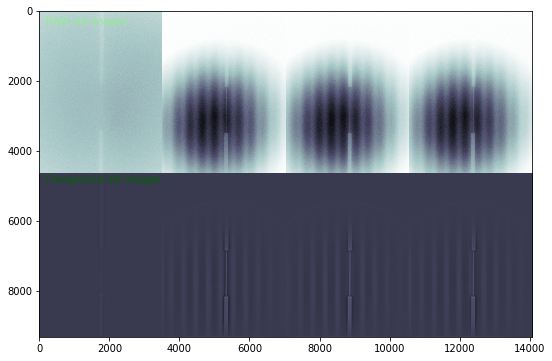

In [9]:
plt.figure(figsize = (12,6))
plt.imshow(np.vstack([ALL,(np.concatenate(enhenced,1)+10000)*4]))
plt.grid(False)
plt.text(200,400, "RAW slit images", color = "lightgreen")
plt.text(200,4900, "Foreground slit images", color = "darkgreen")
plt.show()

### extract slit shape from foreground
We can now use the cv2 function "threshold" to create a mask indicating the position of the slit. 

- more information: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html 

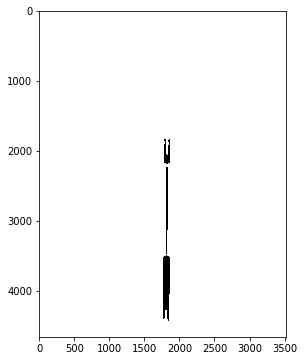

In [10]:
EN  = enhenced[1]
EN1 = EN-EN.min()
EN2 = EN1/EN1.max()*255
thresh    = cv2.threshold(EN2.astype("uint8"),100,100,cv2.THRESH_BINARY_INV)[1]
plt.figure(figsize =(12,6))
plt.imshow(thresh)
plt.show()

In [11]:
def get_slit_mask(EN):
    EN1 = EN-EN.min()
    EN2 = EN1/EN1.max()*255
    return cv2.threshold(EN2.astype("uint8"),100,100,cv2.THRESH_BINARY_INV)[1]

SLITmasks = []
for i in enhenced:
    SLITmasks.append(get_slit_mask(i))
SLITmasks = np.array(SLITmasks)

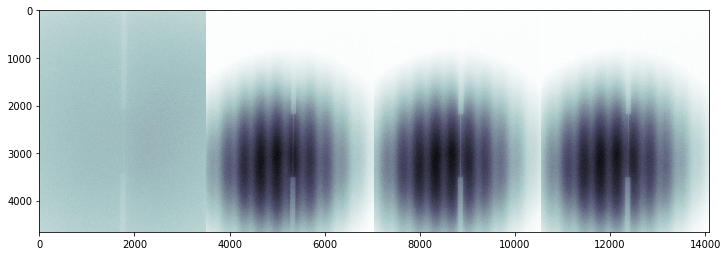

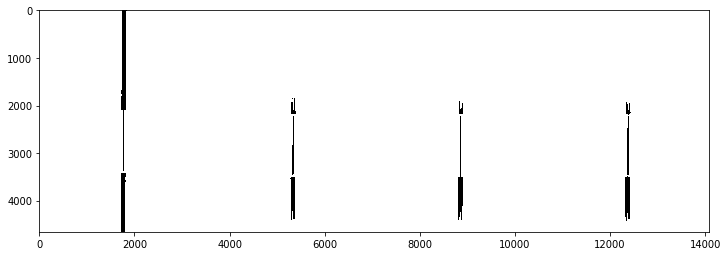

In [12]:
plt.figure(figsize = (12,6))
plt.imshow(ALL)
plt.grid(False)
plt.show()
plt.figure(figsize = (12,6))
plt.imshow(np.concatenate(SLITmasks,1))
plt.grid(False)
plt.show()

In [13]:
def enhence(IM):
    IM0 = ndimage.gaussian_filter(IM,25)
    IM1 = IM  - IM0
    return ndimage.gaussian_filter(IM1,15)

def get_slit_mask(EN):
    EN1 = EN-EN.min()
    EN2 = EN1/EN1.max()*255
    return cv2.threshold(EN2.astype("uint8"),100,100,cv2.THRESH_BINARY_INV)[1]

def get_slit(path):
    IMAGE    = (fits.open(path)[0].data).astype(float)
    BETTER   = enhence(IMAGE)
    return get_slit_mask(BETTER)

start = time.time()
SLIT = get_slit(FITSlist[1])
print "Computation time for all four images: ",str(time.time()-start)+"s"
print "Average Computation time per image:   ",str((time.time()-start)/4.)+"s"

Computation time for all four images:  7.08353686333s
Average Computation time per image:    1.77093446255s


### Speed improvement of the slit extraction routine
Since the 2d Gauss Filter from scipy is computationally expensive, we will try to enhence the computation time by using the opencv function "GaussianBlur".

In [14]:
def normalize(IMAGE):
    IMAGE0   = IMAGE-IMAGE.min()
    IMAGE1   = IMAGE0/IMAGE0.max()*2.**16.
    return IMAGE1.astype("uint16")

IM  = normalize(IMAGES[1])
IM0 = cv2.GaussianBlur(IM,(25,25),20).astype("float")
IM1 = normalize(IM.astype("float")  - IM0)
IM2 = cv2.GaussianBlur(IM1,(25,25),20).astype("float")

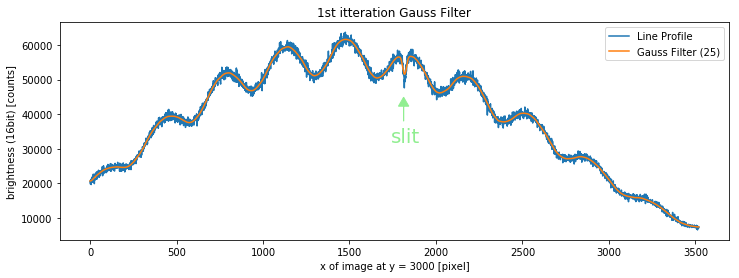

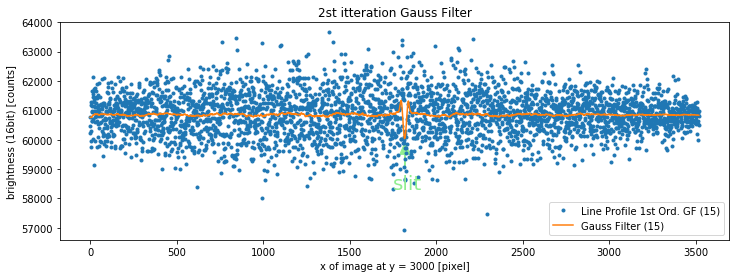

In [15]:
plt.figure(figsize = (12,4))
plt.plot(IM[3000],  label = "Line Profile")
plt.plot(IM0[3000], label = "Gauss Filter (25)")
plt.title("1st itteration Gauss Filter")
plt.arrow(1813,38000,0,4300, color = "lightgreen", 
                               linewidth = 1,
                               head_width = 60,
                               head_length = 2600)
plt.text(1740,32000, "slit", fontsize=20, color = "lightgreen")
plt.xlabel("x of image at y = 3000 [pixel]")
plt.ylabel("brightness (16bit) [counts]")
plt.legend()
plt.show()
plt.figure(figsize = (12,4))
plt.plot(IM1[3000], ".", label = "Line Profile 1st Ord. GF (15)")
plt.plot(IM2[3000]     , label = "Gauss Filter (15)")
plt.arrow(1820,59000,0,500, color = "lightgreen", 
                               linewidth = 1,
                               head_width = 60,
                               head_length = 400)
plt.text(1753,58300, "slit", fontsize=20, color = "lightgreen")
plt.title("2st itteration Gauss Filter")
plt.legend(loc = "lower right")
plt.xlabel("x of image at y = 3000 [pixel]")
plt.ylabel("brightness (16bit) [counts]")
plt.show()

## Summary and Slit Line Position Mark
The get_slit_line function determines the the anchor points of the slit line indicator. The function assumes, that the slit is exactly $90^{\circ}$ vertical and has no curvature. It uses averaging and the find_peak function from the scipy module:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

The functions is significantly faster when giving the approximate distance between the peaks. If the slit length changes, one should also change the distance. However, the get_slit_line function should also work as long as at least two peaks are fund. In any case, the two strongest peaks are used for evaluation. The precision of the solution will only be influenced if less than two peaks are found. 

0.923154115677 s


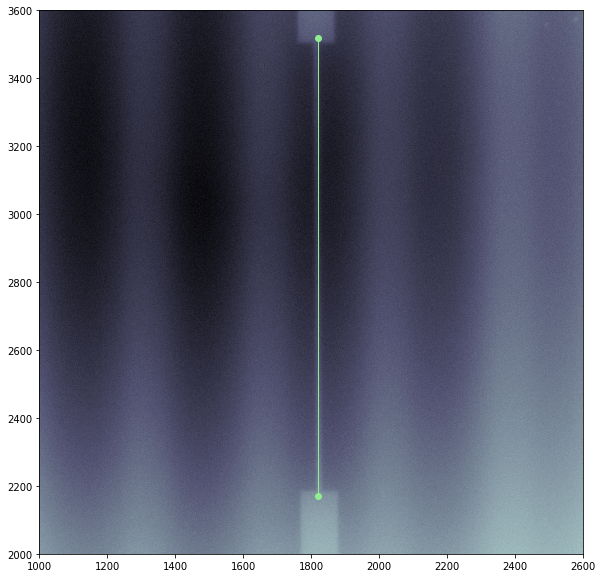

In [16]:
def normalize(IMAGE):
    IMAGE0   = IMAGE-IMAGE.min()+1
    IMAGE1   = IMAGE0/IMAGE0.max()*255
    return IMAGE1.astype("uint16")

def enhenceCV2(IM):
    IM0 = cv2.blur(IM,(50,50)).astype("float")
    IM1 = normalize(IM.astype("float")  - IM0)
    IM2 = cv2.blur(IM1,(30,30)).astype("float")
    return IM2
    
def get_slit_maskCV2(EN):
    EN1 = normalize(EN)
    return cv2.threshold(EN1,100,100,cv2.THRESH_BINARY_INV)[1]

def get_slitCV2(path):
    IMAGE    = (fits.open(path)[0].data).astype(float)
    BETTER   = enhenceCV2(normalize(IMAGE))
    return get_slit_maskCV2(BETTER)

def get_slit_line(SLIT, distance=1000):
    x , _ = find_peaks(SLIT.mean(1), distance=distance)
    y     = SLIT.mean(1)[x]
    sortmask   = np.argsort(y)
    try:
        X  = x[sortmask][-2:]
        Y  = SLIT[X[0]:X[1]].mean(0)
        #Y  = np.argmax(SLIT[X[0]:X[1]].mean(0))
    except:  #### If X has less than two entries 
        X  = np.array([0,SLIT.shape[0]])
        Y  = SLIT.mean(0)
        
    Y  = np.where(Y>Y.max()/2)[0]
    Y  = Y[0]+(Y[-1]-Y[0])/2.
        
    return np.asarray([X,np.array([Y,Y])] )

start = time.time()
SLITCV2 = get_slitCV2(FITSlist[1])
xxyy = get_slit_line(SLITCV2)
print time.time()-start,"s"

plt.figure(figsize=(10,10))
plt.imshow(IMAGES[1])
plt.plot(xxyy[1],xxyy[0], "-o",color = "lightgreen", linewidth = 1)
plt.ylim([2000,3600])
plt.xlim([1000,2600])
plt.grid(False)
plt.show()

next we can inspect, how the script performs for the three other sample images.

4.06539511681 s


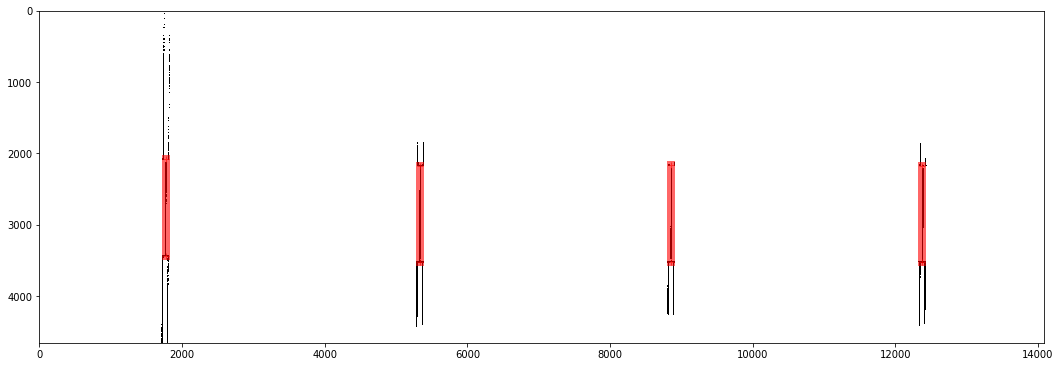

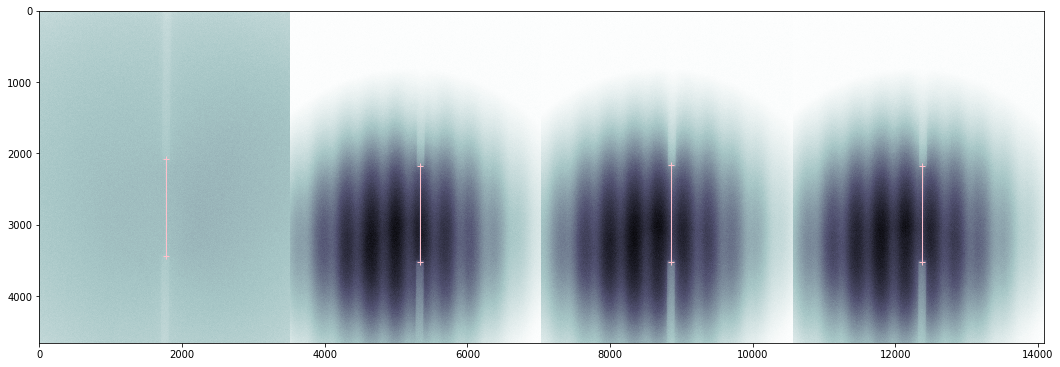

In [17]:
start = time.time()
SLITSCV2 = []
XY       = []

for i in FITSlist:
    SLITSCV2.append(get_slitCV2(i))
    XY.append(get_slit_line(SLITSCV2[-1]))
SLITSCV2 = np.array(SLITSCV2)
print time.time()-start,"s"

plt.figure(figsize = (18,12))
plt.imshow(np.concatenate(SLITSCV2,1))
for i in range(len(XY)):
    plt.plot(XY[i][1]+i*3520,XY[i][0], "-+r", linewidth = 8, alpha = 0.6)
plt.grid(False)
plt.show()

plt.figure(figsize = (18,12))
plt.imshow(ALL)
for i in range(len(XY)):
    plt.plot(XY[i][1]+i*3520,XY[i][0], "-+",color = "pink", linewidth = 1)
plt.grid(False)
plt.savefig("slit.png")
plt.show()

## Slit Width

we can determine the slit width by computing the FWHM of average function along the x axis of the extracted slit area. 

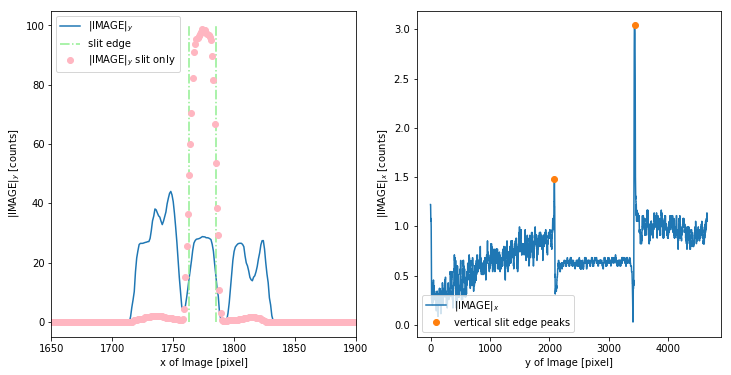

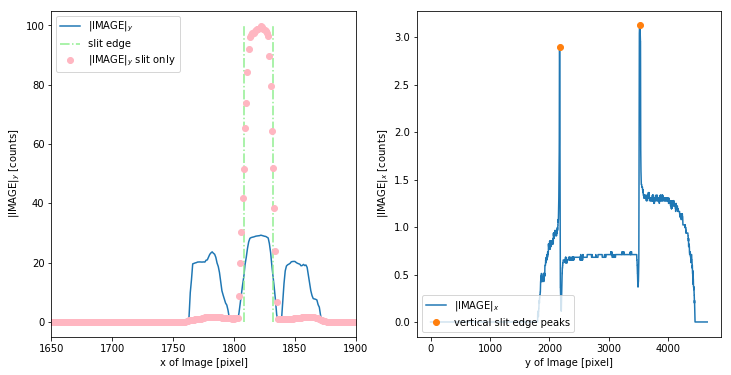

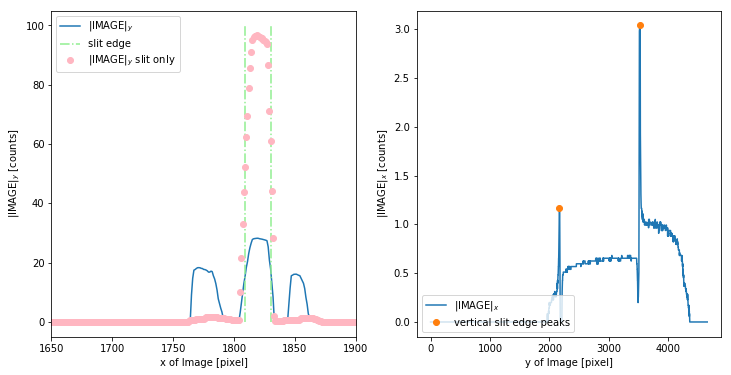

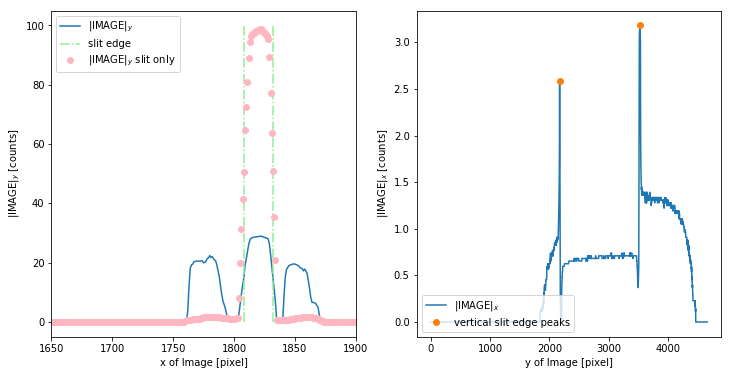

In [18]:
for i in SLITSCV2:
    peaks_y, _ = find_peaks(i.mean(1), distance=1000)
    peaks_x   = i.mean(1)[peaks_y]
    sortmask   = np.argsort(peaks_x)
    PX = peaks_x[sortmask][-2:]
    PY = peaks_y[sortmask][-2:]
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
    axs[0].plot(i.mean(0) , label = "|IMAGE|$_y$")
    Z = i[PY[0]:PY[1]].mean(0)
    mask=np.where(Z>Z.max()/2.)[0]
    axs[0].plot([mask[ 0],mask[ 0]],[0,100], "-.",
                 color = "lightgreen", label = "slit edge")
    axs[0].plot([mask[-1],mask[-1]],[0,100], "-.",color = "lightgreen")
    axs[0].plot(Z, "o", color = "lightpink",label = "|IMAGE|$_y$ slit only")
    axs[0].set_xlim([1650,1900])
    axs[0].set_xlabel("x of Image [pixel]")
    axs[0].set_ylabel("|IMAGE|$_y$ [counts]")    
    axs[0].legend(loc = "upper left")
    
    axs[1].plot(i.mean(1) , label = "|IMAGE|$_x$")
    axs[1].plot(PY,PX, "o", label = "vertical slit edge peaks")
    axs[1].set_xlabel("y of Image [pixel]")
    axs[1].set_ylabel("|IMAGE|$_x$ [counts]")
    axs[1].legend(loc = "lower left")
    plt.show()

## Fitting
For cases, where the slit is not vertical, we can fit the masked slit points. 

In [19]:
SLITCV2 = get_slitCV2(FITSlist[1])
X,Y = get_slit_line(SLITCV2)

In [20]:
def get_corners(SLITCV2, horizontal):
    top      = horizontal[0]
    bottom   = horizontal[-1]

    Z = SLITCV2[int(top):int(bottom)].mean(0)
    vertical=np.where(Z>Z.max()/2.)[0]#
    
    left  = vertical[ 0]
    right = vertical[-1]

    return top, bottom, left, right
TBLR = get_corners(SLITCV2, horizontal = X)

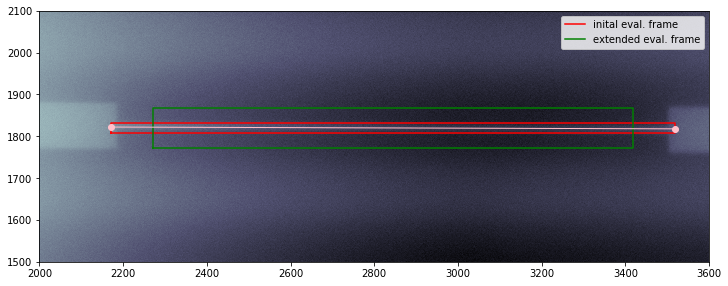

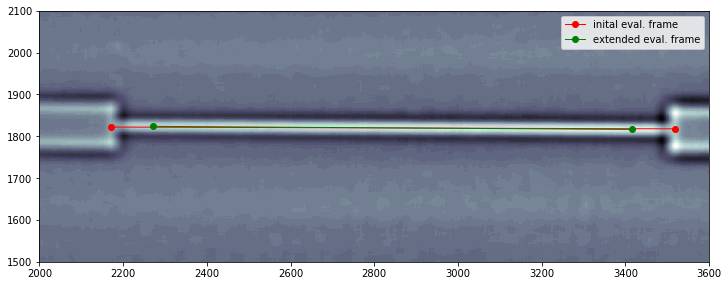

In [21]:
def linear_fit(x,y):
    COEF = np.polyfit(y,x,1)
    y1  = y.min() 
    y2  = y.max()
    x1 = COEF[0]*y1+COEF[1]
    x2 = COEF[0]*y2+COEF[1]
    return y1, y2, x1, x2 

def resize_frame(TBLR, W=1.4, H=0.9):
    T,B,L,R = TBLR 
    CW, CH = (R-L)*(W-1.)/2., (T-B)*(H-1.)/2.
    return T+CH, B-CH, L-CW, R+CW

def get_points(SLIT, TBLR):
    T,B,L,R = TBLR
    CROP = SLIT[int(T):int(B),int(L):int(R)]
    Y,X = np.where(CROP>CROP.max()/2.)
    return X+L, Y+T

def get_points_image(IMAGE, TBLR):
    T,B,L,R = TBLR
    CROP = IMAGE[int(T):int(B),int(L):int(R)]
    CROP = CROP-CROP.max()
    CROP = CROP/CROP.min()
    Y,X = np.where(CROP>CROP.max()/2.)
    return X+L, Y+T

XX, YY          = get_points(SLITCV2, TBLR)
YY1,YY2,XX1,XX2 = linear_fit(XX, YY)



ENIM     = enhenceCV2(normalize(IMAGES[1]))

TBLRZ               = resize_frame(TBLR, W=4., H=0.85)
XXZ, YYZ            = get_points_image(ENIM, TBLRZ)
YY1Z,YY2Z,XX1Z,XX2Z = linear_fit(XXZ, YYZ)


plt.figure(figsize=(12,6))
plt.imshow(IMAGES[1].T)
T,B,L,R = TBLR 
TZ,BZ,LZ,RZ = TBLRZ 
plt.plot([T,T,B,B,T],[L,R,R,L,L], "-r"          , label = "inital eval. frame")
plt.plot([TZ,TZ,BZ,BZ,TZ],[LZ,RZ,RZ,LZ,LZ], "-g", label = "extended eval. frame")
plt.plot([YY1,YY2],[XX1,XX2], "-o",color = "pink", linewidth = 1,alpha = 1)
plt.grid(False)
plt.legend()

plt.xlim([2000,3600])
plt.ylim([1500,2100])
plt.show()


plt.figure(figsize=(12,6))
plt.imshow(ENIM.T)
plt.plot([YY1 ,YY2 ],[XX1 ,XX2 ], "-or", linewidth = 1,alpha = 1, label = "inital eval. frame")
plt.plot([YY1Z,YY2Z],[XX1Z,XX2Z], "-og", linewidth = 1,alpha = 1, label = "extended eval. frame")
plt.xlim([2000,3600])
plt.ylim([1500,2100])
plt.grid(False)
plt.legend()
plt.show()

The fitting process has not really improved the final result so far. This will be investigated in the future.

## Summary
Following, we summarize the necessary functions and check the results for all four test files.

In [22]:
def normalize(IMAGE):
    IMAGE0   = IMAGE-IMAGE.min()+1
    IMAGE1   = IMAGE0/IMAGE0.max()*2.**8.
    return IMAGE1.astype("uint8")

def enhenceCV2(IM):
    IM0 = cv2.blur(IM,(50,50)).astype("float")
    IM1 = normalize(IM.astype("float")  - IM0)
    IM2 = cv2.blur(IM1,(30,30)).astype("float")
    return IM2
    
def get_slit_maskCV2(EN):
    EN1 = normalize(EN)
    return cv2.threshold(EN1,100,100,cv2.THRESH_BINARY_INV)[1]

def get_slit_line(SLIT, distance=1000):
    x , _ = find_peaks(SLIT.mean(1), distance=distance)
    y     = SLIT.mean(1)[x]
    sortmask   = np.argsort(y)
    try:
        X  = x[sortmask][-2:]
        Y  = SLIT[X[0]:X[1]].mean(0)
        #Y  = np.argmax(SLIT[X[0]:X[1]].mean(0))
    except:  #### If X has less than two entries 
        X  = np.array([0,SLIT.shape[0]])
        Y  = SLIT.mean(0)
        
    Y  = np.where(Y>Y.max()/2)[0]
    Y  = Y[0]+(Y[-1]-Y[0])/2.
        
    return np.asarray([X,np.array([Y,Y])] )

def get_corners(SLITCV2, horizontal):
    top      = horizontal[0]
    bottom   = horizontal[-1]

    Z = SLITCV2[int(top):int(bottom)].mean(0)
    vertical=np.where(Z>Z.max()/2.)[0]#
    
    left  = vertical[ 0]
    right = vertical[-1]

    return top, bottom, left, right

def linear_fit(x,y):
    COEF = np.polyfit(y,x,1)
    y1  = y.min() 
    y2  = y.max()
    x1 = COEF[0]*y1+COEF[1]
    x2 = COEF[0]*y2+COEF[1]
    return y1, y2, x1, x2 

def resize_frame(TBLR, W=1.4, H=0.9):
    T,B,L,R = TBLR 
    CW, CH = (R-L)*(W-1.)/2., (T-B)*(H-1.)/2.
    return T+CH, B-CH, L-CW, R+CW

def get_points(SLIT, TBLR):
    T,B,L,R = TBLR
    CROP = SLIT[int(T):int(B),int(L):int(R)]
    Y,X = np.where(CROP>CROP.max()/2.)
    return X+L, Y+T

def get_points_image(IMAGE, TBLR):
    T,B,L,R = TBLR
    CROP = IMAGE[int(T):int(B),int(L):int(R)]
    CROP = CROP-CROP.max()
    CROP = CROP/CROP.min()
    Y,X = np.where(CROP>CROP.max()/2.)
    return X+L, Y+T


#IMAGE               = IMAGES[2]
#BETTER              = enhenceCV2(normalize(IMAGE))
#SLITCV2             = get_slit_maskCV2(BETTER)
#X,Y                 = get_slit_line(SLITCV2)
#TBLR                = get_corners(SLITCV2, horizontal = X)
#XX, YY              = get_points(SLITCV2, TBLR)
#YY1,YY2,XX1,XX2     = linear_fit(XX, YY)

#TBLRZ               = resize_frame(TBLR, W=4., H=0.9)
#XXZ, YYZ            = get_points_image(BETTER, TBLRZ)
#YY1Z,YY2Z,XX1Z,XX2Z = linear_fit(XXZ, YYZ)
FITSlist = glob(tiffpath+"*.fits")
IMAGES = []
for i in FITSlist:
    IMAGES.append(fits.open(i)[0].data)
IMAGES = np.array(IMAGES).astype(float)

(4656, 3520)
[1775 1777 1778 ... 1779 1780 1781]


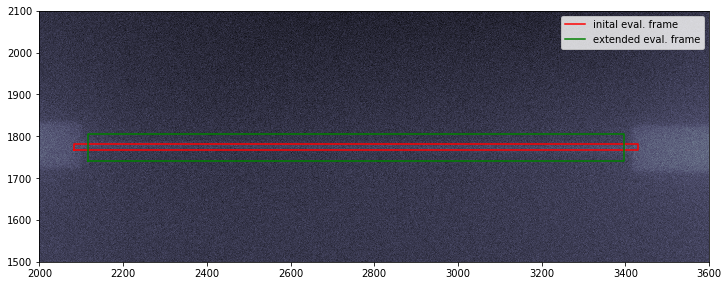

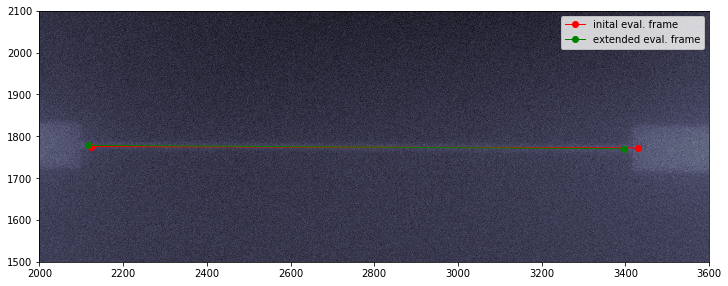

(4656, 3520)
[1813 1814 1815 ... 1828 1829 1830]


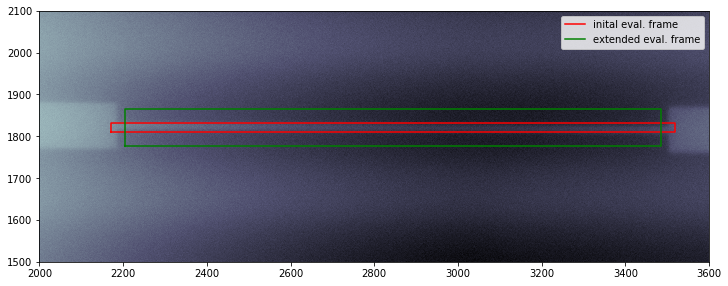

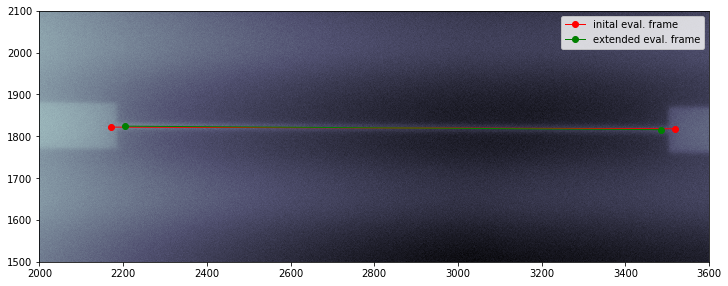

(4656, 3520)
[1823 1824 1822 ... 1824 1825 1827]


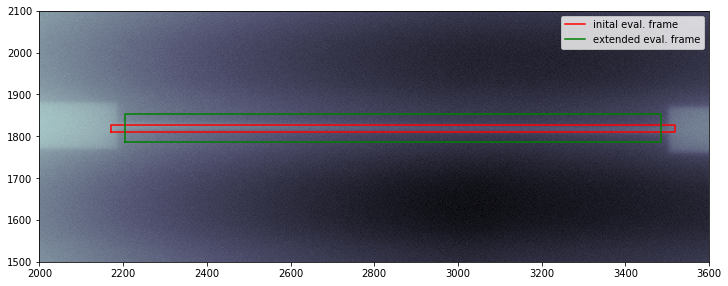

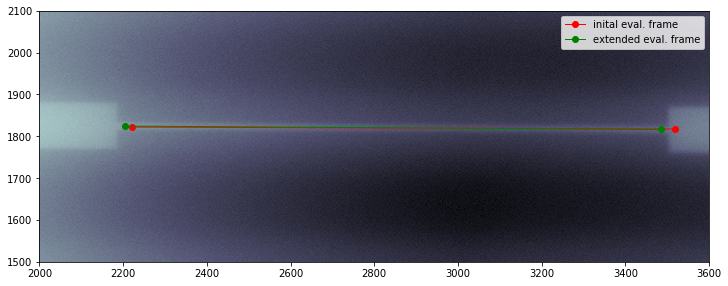

(4656, 3520)
[1822 1823 1824 ... 1827 1828 1829]


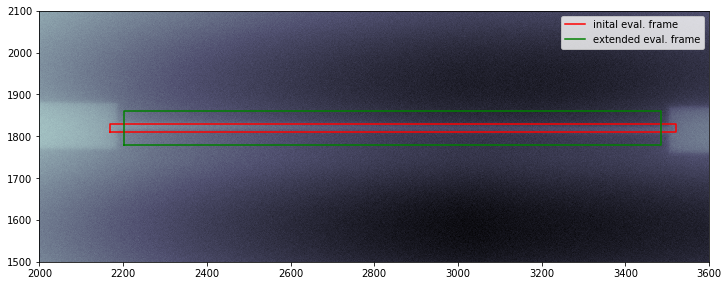

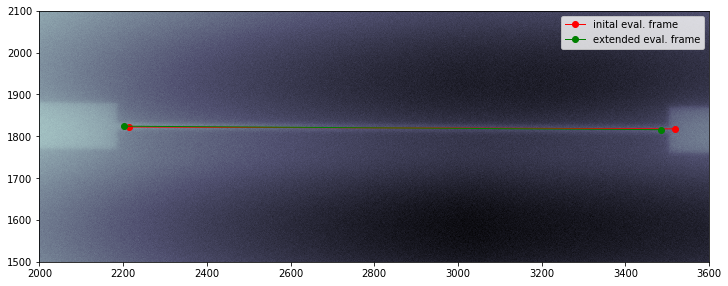

In [23]:
def do_all(IMAGES):
    for i in IMAGES:
        IMAGE               = i
        print IMAGE.shape
        BETTER              = enhenceCV2(normalize(IMAGE))
        SLITCV2             = get_slit_maskCV2(BETTER)
        X,Y                 = get_slit_line(SLITCV2)
        TBLR                = get_corners(SLITCV2, horizontal = X)
        XX, YY              = get_points(SLITCV2, TBLR)
        YY1,YY2,XX1,XX2     = linear_fit(XX, YY)
        print XX

        TBLRZ               = resize_frame(TBLR, W=4., H=0.95)
        XXZ, YYZ            = get_points_image(BETTER, TBLRZ)
        YY1Z,YY2Z,XX1Z,XX2Z = linear_fit(XXZ, YYZ)

        plt.figure(figsize=(12,6))
        plt.imshow(IMAGE.T)
        T,B,L,R = TBLR 
        TZ,BZ,LZ,RZ = TBLRZ 
        plt.plot([T,T,B,B,T],[L,R,R,L,L], "-r"          , label = "inital eval. frame")
        plt.plot([TZ,TZ,BZ,BZ,TZ],[LZ,RZ,RZ,LZ,LZ], "-g", label = "extended eval. frame")
        plt.grid(False)
        plt.legend()

        plt.xlim([2000,3600])
        plt.ylim([1500,2100])
        plt.show()
        
        
        
        plt.figure(figsize=(12,6))
        plt.imshow(IMAGE.T)
        plt.plot([YY1 ,YY2 ],[XX1 ,XX2 ], "-or", linewidth = 1,alpha = 1, label = "inital eval. frame")
        plt.plot([YY1Z,YY2Z],[XX1Z,XX2Z], "-og", linewidth = 1,alpha = 1, label = "extended eval. frame")
        plt.xlim([2000,3600])
        plt.ylim([1500,2100])
        plt.grid(False)
        plt.legend()
        plt.show()
        
do_all(IMAGES)

## Script Description &  Benchmark
We have created a separate script (__slitfinder.py__) which takes one or no arguments (fits file from which to extract the slit position) and returns a ds9 region file containing the two anchor points of a straight line in pink (because pink is the new green). 

### Dependencies
__slitfinder.py__ requires the following python packages:
- numpy
- cv2 
- astropy
- scipy

### Benchmark
We ran the script on each file on different machines. On average, it takes three to four seconds to compute the slit anchor points and to write them to file. Approximately half the time is used to pre-process the image (since the gaussian filter is relatively heavy). Another large chunk of the time is spend with the fitting process, which is necessary to determine the angle of the slit.

### TODO:
- find faster alternative to gauss filter (cv2 is already 8x faster than scipy)
- find faster way to compute angel --> hough lines (https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html)
- code clean-up and readability 
- improve notebook

    I7-3820QM (4GB)     XEON-W3680  (128GB)      2xXEON-X5690 (40GB)
    FILE 1:  3.57 s       FILE 1:  2.86s           FILE 1:  2.95
    FILE 2:  3.61 s       FILE 2:  2.89s           FILE 2:  2.99
    FILE 3:  3.53 s       FILE 3:  2.88s           FILE 3:  2.9
    FILE 4:  3.49 s       FILE 4:  2.91s           FILE 4:  2.87
       ALL:  15.1 s          ALL:  11.6s              ALL:  11.7

## Version 2: Outer- and Inner-Slit Center

In [24]:
IMAGES.shape

(4, 4656, 3520)

In [25]:
BETTER   = enhenceCV2(normalize(IMAGES[1]))
SLITMASK = get_slit_maskCV2(BETTER)    
SLITENDS = find_peaks(SLITMASK.mean(1), distance=1000)[0]

print SLITENDS

[2171 3519]


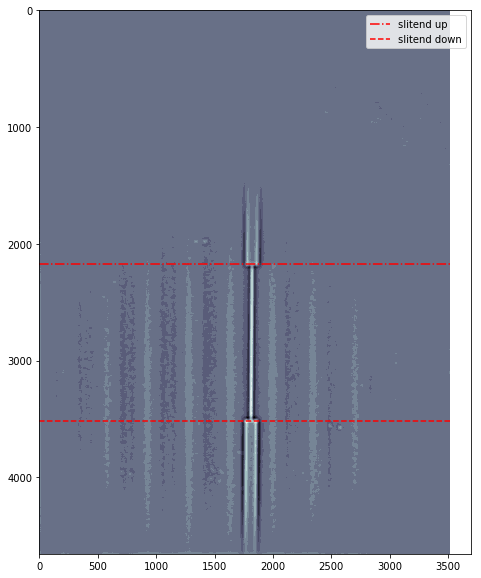

In [26]:
plt.figure(figsize = (10,10))
plt.imshow(BETTER)
plt.plot([0,BETTER.shape[1]],[SLITENDS[0],SLITENDS[0]], "-.r" ,label = "slitend up")
plt.plot([0,BETTER.shape[1]],[SLITENDS[1],SLITENDS[1]], "--r" ,label = "slitend down")
plt.legend()
plt.show()

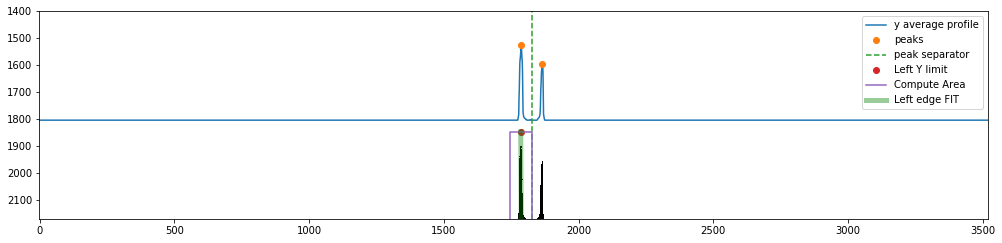

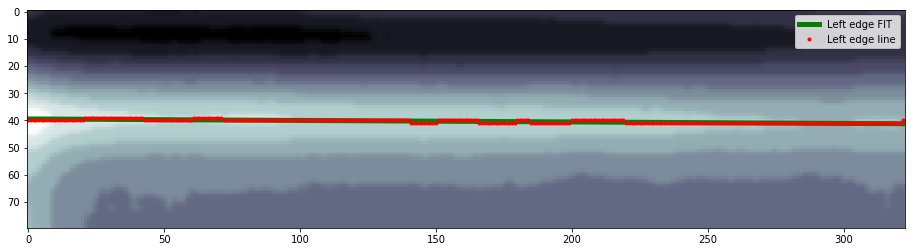

In [27]:

UPPERMASK = SLITMASK[:SLITENDS[0]] 
PEAKS_X   = find_peaks(UPPERMASK.mean(0))[0]
PEAKS_Y   = UPPERMASK.mean(0)[PEAKS_X]
PEAKS_X   = PEAKS_X[np.argsort(PEAKS_Y)][-2:]
PEAKS_Y   = PEAKS_Y[np.argsort(PEAKS_Y)][-2:]

#### separate the peaks
PEAKSC_X   = PEAKS_X[0]+(PEAKS_X[1]-PEAKS_X[0])/2.
MLTOPY,MLTOPX  = np.where(UPPERMASK[:,:int(PEAKSC_X)]>0)
ARGMIN     = np.argmin(MLTOPY)
YMIN, XMIN = MLTOPY[ARGMIN],MLTOPX[ARGMIN]
BORD_TBLR  = YMIN,UPPERMASK.shape[0],2*XMIN-PEAKSC_X, PEAKSC_X
BT,BB,BL,BR= BORD_TBLR

ZLBETTER           = cv2.GaussianBlur(BETTER[int(BT):SLITENDS[0],int(BL):int(BR)],(25,25),1)
ZY                 = np.argmin(ZLBETTER,axis = 1)
ZYFIT              = linear_fit(ZY[::-1],np.arange(ZY.shape[0]))
FX1, FX2, FY1, FY2 = ZYFIT 


plt.figure(figsize = (17,4))
plt.imshow(UPPERMASK)
plt.plot(UPPERMASK.shape[0]/6*5-UPPERMASK.mean(0)*20.     , label = "y average profile")
plt.plot(PEAKS_X,UPPERMASK.shape[0]/6*5-PEAKS_Y*20., "o"  , label = "peaks")
plt.plot([PEAKSC_X,PEAKSC_X],[0,UPPERMASK.shape[0]], "--", label = "peak separator")
plt.plot(XMIN,YMIN, "o", label = "Left Y limit")
plt.plot([BL,BL,BR,BR],[BB,BT,BT,BB], label = "Compute Area")
plt.plot([BL+FY1, BL+FY2],[BT+FX1, BT+FX2], "-g", linewidth = 5, label = "Left edge FIT", alpha = 0.4)
plt.ylim([UPPERMASK.shape[0],1400])
plt.legend(loc = "upper right")
plt.show()

plt.figure(figsize = (17,4))
plt.imshow(ZLBETTER.T[:,::-1])
#plt.colorbar()
plt.plot([FX1, FX2],[FY1, FY2], "-g", linewidth = 5, label = "Left edge FIT")
plt.plot(ZY[::-1], ".r", label = "Left edge line")
plt.legend()
plt.show()

1826.0 1810.0
[2171 3519]
[-1.18694362e-02  1.85176855e+03]


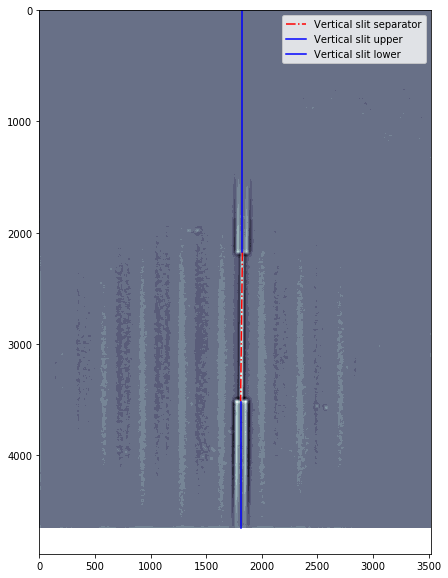

In [28]:
def get_mean_peaks(MASK):
    PEAKS_X   = find_peaks(MASK.mean(0))[0]
    PEAKS_Y   = MASK.mean(0)[PEAKS_X]
    return  np.asarray([PEAKS_X[np.argsort(PEAKS_Y)][-2:],
                       PEAKS_Y[np.argsort(PEAKS_Y)][-2:]])

def get_separators(UPPER, SLITENDS):    
    UPPER_PEAKS = get_mean_peaks(UPPER)
    UPSEPARATOR = UPPER_PEAKS[0,0]+(UPPER_PEAKS[0,1]-UPPER_PEAKS[0,0])/2. 
    return UPSEPARATOR

def get_outer_fits(XU, XL, SLITENDS, MASK):
    def linear_fit(x,y):
        return np.polyfit(y,x,1)
    print XU, XL
    print SLITENDS
    CDO = linear_fit([XU,XL],SLITENDS)
    print CDO
    xU0 = CDO[1]
    xL0 = CDO[0]*MASK.shape[0]+CDO[1]
    return xU0, xL0
#def get_areas(X):

UPPER = SLITMASK[:SLITENDS[0]] 
LOWER = SLITMASK[SLITENDS[1]:] 
XU    = get_separators(UPPER, SLITENDS)
XL    = get_separators(LOWER, SLITENDS)
xU0, xL0 = get_outer_fits(XU, XL, SLITENDS, SLITMASK)

plt.figure(figsize = (10,10))
plt.imshow(BETTER)
plt.plot([XU, XL],[SLITENDS[0],SLITENDS[1]]     , "-.r",label = "Vertical slit separator")
plt.plot([XU, XU],[SLITENDS[0],0]              , "-b" ,label = "Vertical slit upper")
plt.plot([XL, XL],[SLITENDS[1],SLITMASK.shape[0]]  , "-b" ,label = "Vertical slit lower")

plt.legend()
plt.show()

## Outer slit simple

In [29]:
def simple_outer_slit(DATA):
    BETTER   = enhenceCV2(normalize(DATA))
    SLITMASK = get_slit_maskCV2(BETTER)    
    x          = find_peaks(SLITMASK.mean(1), distance=1000)[0]
    y          = SLITMASK.mean(1)[x]
    SLITENDS   = x[np.argsort(y)[-2:]]
    UPPER = SLITMASK[:SLITENDS[0]] 
    LOWER = SLITMASK[SLITENDS[1]:] 
    XU    = get_separators(UPPER, SLITENDS)
    YU    = SLITENDS[0]
    XL    = get_separators(LOWER, SLITENDS)
    YL    = SLITENDS[1]
    YS    = 0
    YE    = SLITMASK.shape[0]
    return XU, XL, YU, YL, YS, YE
    
FITSlist = glob("*.fits")
IMAGES = []
for i in FITSlist:
    IMAGES.append(fits.open(i)[0].data)
IMAGES = np.array(IMAGES).astype(float)

for i in IMAGES:
    XU, XL, YU, YL, YS, YE = simple_outer_slit(i)  
    plt.figure(figsize = (12,9))
    plt.imshow(i)
    plt.plot([XU, XU],[YU,YS] , "-b" ,label = "Vertical slit upper")
    plt.plot([XL, XL],[YL,YE] , "-b" ,label = "Vertical slit lower")
    plt.show()



## Rotated Slit 
The slit can be rotated. Therefore, we have to de-rotate the slit before determining the slit edges.
### Load rotated slit data
We have created some artificially produced rotated slit images and put them in a .tiff container. Next, we will load the 16bit tiff files from file.

In [30]:
tiffpath = "tiff/"
TIFFlist = glob(tiffpath+"*.tiff")
print TIFFlist

IMAGES = []
for i in TIFFlist:
    data = cv2.imread(i,-1)
    IMAGES.append(data)
IMAGES = np.asarray(IMAGES).astype(float)

['tiff/slv190202_test.tiff', 'tiff/slv190221_0003.tiff', 'tiff/slv190221_0003_rot.tiff', 'tiff/slv190221_0004.tiff', 'tiff/slv190221_0004_rot.tiff', 'tiff/slv190221_0005.tiff', 'tiff/slv190221_0005_rot.tiff']


### Slit detection
Just like before, we will extract the slit coordinates and than determine the parameters of the linear fitting function.

[2532.79764502 1023.02073096]


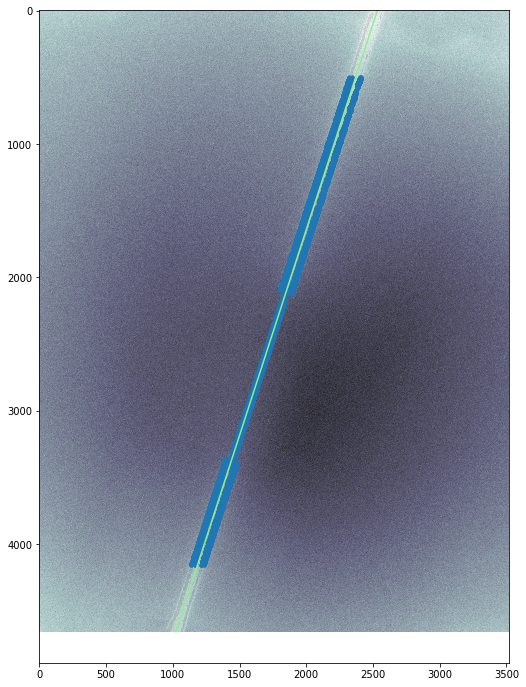

In [31]:
def normalize(IMAGE, BIT = 8):
    IMAGE0   = IMAGE-IMAGE.min()
    IMAGE1   = IMAGE0/IMAGE0.max()*2**int(BIT)
    return IMAGE1.astype("uint"+str(int(BIT)))

def enhenceCV2(IM):
    IM0 = cv2.blur(IM,(50,50)).astype("float")
    IM1 = normalize(IM.astype("float")  - IM0)
    IM2 = cv2.blur(IM1,(40,40)).astype("float")
    return IM2

def linear_fit(y,x, image):
    COEF = np.polyfit(x,y,1)
    x1  = 0.
    x2  = image.shape[0]
    y1 = COEF[0]*x1+COEF[1]
    y2 = COEF[0]*x2+COEF[1]
    return np.asarray([y1,y2]),np.asarray([x1,x2]), COEF

crop = 500

IM0  = IMAGES[0]
IM0E = enhenceCV2(IM0)

thresh = cv2.threshold(normalize(IM0E),100,100,cv2.THRESH_BINARY_INV)[1]
canny  = cv2.Canny(thresh,1,1, apertureSize = 7)

y ,x  = np.where(canny[crop:-crop,crop:-crop] == 255)
x += 500
y += 500

Xfit , Yfit , ANG = linear_fit(x,y,IM0)

print Xfit

plt.figure(figsize = (12,12))
plt.imshow(IM0)
plt.imshow(thresh, cmap = "Reds", alpha = 0.1)
plt.plot(x,y, ".")
plt.plot(Xfit,Yfit, "lightgreen")


plt.grid(False)
plt.show()

### Extracting the slit edges of a rotated slit through projection.

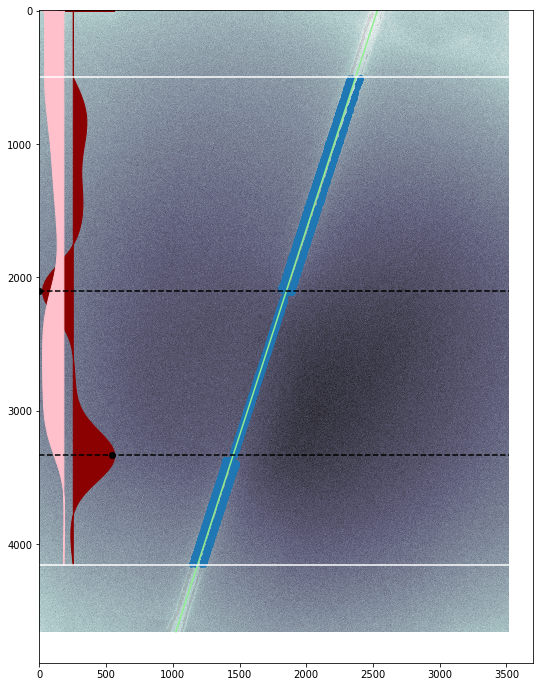

In [32]:
def filter_data(data, crop = 500):
    GAUSS = ndimage.filters.gaussian_filter1d(data[crop:-crop-1],200)
    DGAUS = np.diff(GAUSS)/np.diff(GAUSS).max()
    return np.array([GAUSS-GAUSS.min(), DGAUS-DGAUS.min()])

def get_slitEnds(data,crop = 500):
    DFILY  = filter_data(data.mean(1),crop)[1]
    Y1, Y2 = np.argmin(DFILY),np.argmax(DFILY)
    
    return np.array([Y1,Y2])+crop

FILY, DFILY = filter_data(thresh.mean(1))*thresh.shape[0]/15.
YE          = get_slitEnds(thresh)


plt.figure(figsize = (12,12))
plt.imshow(IM0)
plt.imshow(thresh, cmap = "Reds", alpha = 0.1)
plt.plot(x,y, ".")


plt.plot(Xfit,Yfit, "lightgreen")

plt.fill_between(DFILY+20,0,np.arange(DFILY.shape[0])+500, color = "darkred")
plt.fill_between(FILY+20 ,0,np.arange( FILY.shape[0])+500, color = "pink")

plt.plot(DFILY[YE-500],YE,  "ok")
plt.plot([0,thresh.shape[1]],[500            ,500            ],  "w")
plt.plot([0,thresh.shape[1]],[thresh.shape[0]-500,thresh.shape[0]-500],  "w")
plt.plot([0,thresh.shape[1]],[YE[0],YE[0]],  "--k")
plt.plot([0,thresh.shape[1]],[YE[1],YE[1]],  "--k")


plt.grid(False)
plt.show()

### Slit Derotation and Testing
Following we perform the following procedures:
- fit the slit.
- de-rotate the image based on the fitted slit.
- extract the slit edges and create slit vectors
- rotate slit vectors
- extract slit edges

('Slit Rotation Angle: ', 17.94334578344251, 'deg')


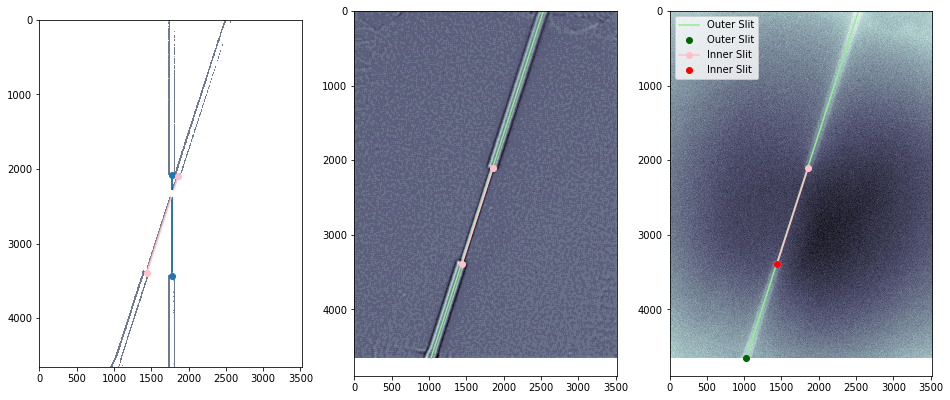

('Slit Rotation Angle: ', 0.31707219535775266, 'deg')


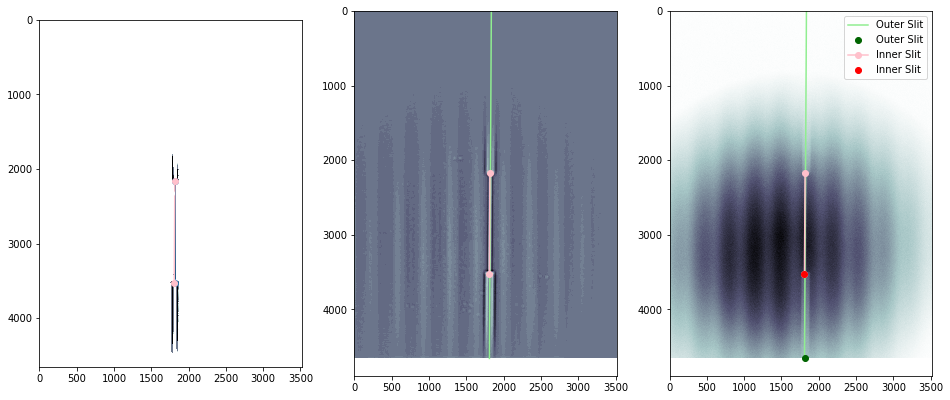

('Slit Rotation Angle: ', -9.275634660806702, 'deg')


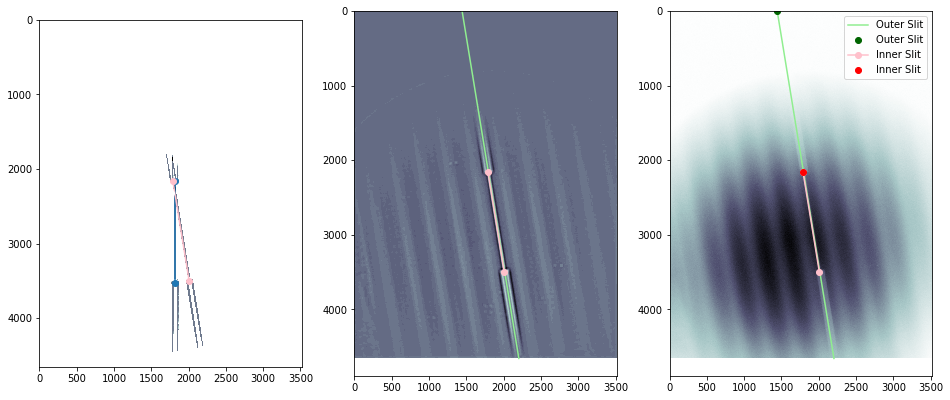

('Slit Rotation Angle: ', 0.16577128271794095, 'deg')


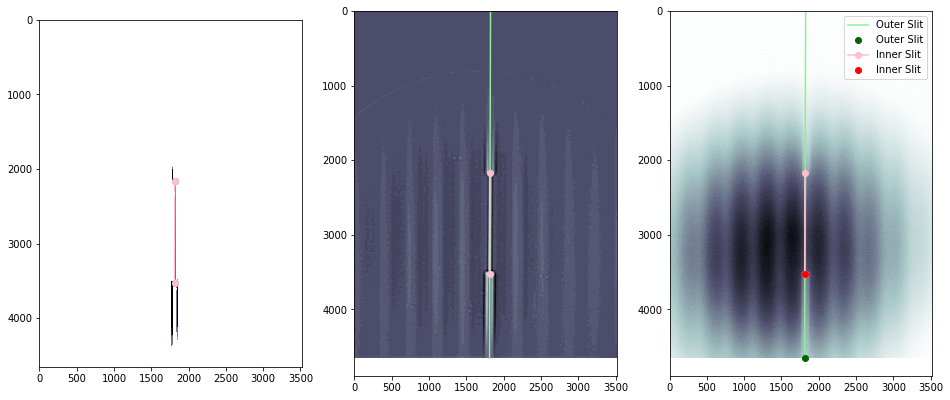

('Slit Rotation Angle: ', -23.67122325365972, 'deg')


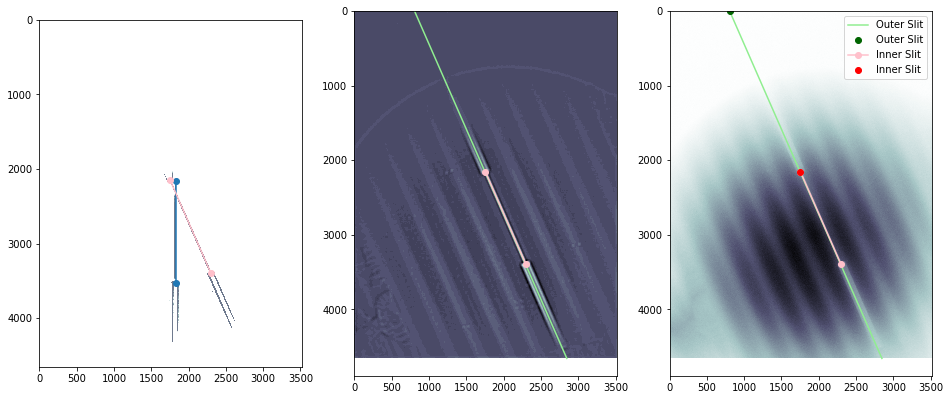

('Slit Rotation Angle: ', 0.29670594528721494, 'deg')


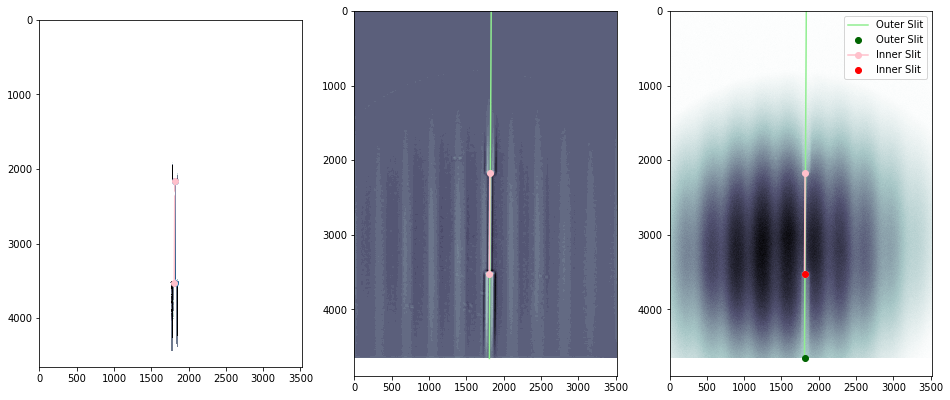

('Slit Rotation Angle: ', 70.56393885555767, 'deg')


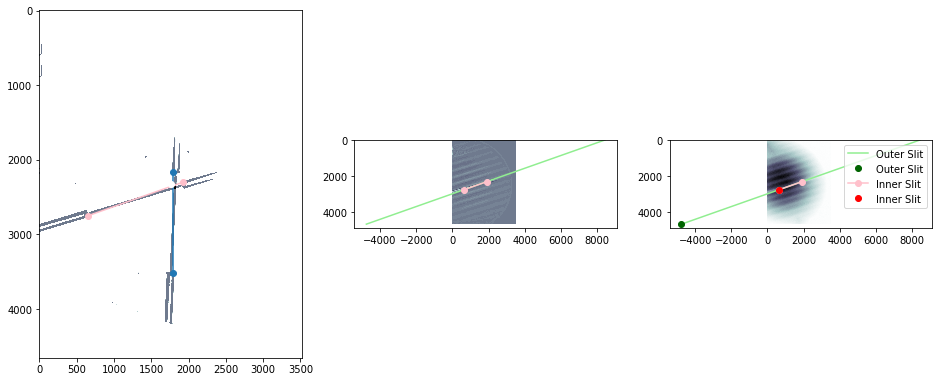

In [33]:
def get_slit_peaks(SLIT, distance = 500):
    y , _ = find_peaks(SLIT.mean(1), distance=distance)
    x     = SLIT.mean(1)[y]
    SMASK = np.argsort(x)[-2:]
    x,y   = x[SMASK],sorted(y[SMASK])
    x     = np.argmax(SLIT[y[0]:y[1]].mean(0))
    x     = np.array([x,x])
    return np.array([x,y])

def vector_rotate(origin, point, angle):
    angle = angle/180.*np.pi
    oy, ox = float(origin[0])      , float(origin[1])
    py, px = point[0].astype(float), point[1].astype(float)

    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
    return qy, qx

def get_rot_all(IM0,crop = 500):
    IM0E = enhenceCV2(IM0)

    thresh = cv2.threshold(normalize(IM0E),100,100,cv2.THRESH_BINARY_INV)[1]
    canny  = cv2.Canny(thresh,1,1, apertureSize = 7)

    y ,x  = np.where(canny[crop:-crop,crop:-crop] == 255)
    x += crop
    y += crop

    Xfit, Yfit, ANG    = linear_fit(x,y,thresh)
    #Xfit2, Yfit2, ANG2 = linear_fit(x,y,thresh)
    
    
    XY_sort_mask    = np.argsort(Xfit)
    Yfit            = Yfit[XY_sort_mask]
    Xfit            = Xfit[XY_sort_mask]
    
    origin  = (thresh.shape[1]/2,thresh.shape[0]/2)
    rotation = 180.-np.arctan(ANG[0])/np.pi*180.
    if rotation > 90:
        rotation = rotation - 180.
    print("Slit Rotation Angle: ",rotation,"deg")
    #rotANG = ndimage.rotate(thresh, rotation)
    rot_mat = cv2.getRotationMatrix2D(origin,rotation,1.)
    rotANG  = cv2.warpAffine(thresh, rot_mat, 
                             (thresh.shape[1],thresh.shape[0]), 
                             flags=cv2.INTER_LINEAR)
    x, y    = get_slit_peaks(rotANG)
    X, Y    = vector_rotate(origin, (x,y), -rotation)
    XY_sort_mask2 = np.argsort(X)
    Y            = Y[XY_sort_mask2]
    X            = X[XY_sort_mask2]
    
    
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (16,8))
    axs[0].imshow(rotANG+thresh)
    axs[0].plot(x,y, "-o")
    axs[0].plot(X,Y, "-o", color = "pink", label = "Initial rotated Slit")
    axs[0].plot(origin[0], origin[1], "ow", label = "Derotated Slit")
    
    axs[1].imshow(IM0E)
    axs[1].plot(Xfit,Yfit, "lightgreen")
    axs[1].plot(X,Y, "-o", color = "pink")
    
    axs[2].imshow(IM0)
    axs[2].plot(Xfit,Yfit, "lightgreen", label = "Outer Slit")
    axs[2].plot(Xfit[0],Yfit[0], "o",color = "darkgreen", label = "Outer Slit")
    axs[2].plot(X,Y, "-o", color = "pink", label = "Inner Slit")
    axs[2].plot(X[0],Y[0], "o", color = "red", label = "Inner Slit")
    axs[2].legend()
    plt.show()
    
for i in IMAGES:
    Lines = get_rot_all(i,crop = 300)

The algorithm works relatively well for rotation angles between $-45^{\circ}$ and $45^{\circ}$.